In [1]:
# Goal: Estimate the photometric cadence
import sys, os, shelve, glob
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset

In [2]:
ds = dataset.load_dataset('SN2019odp_phot')

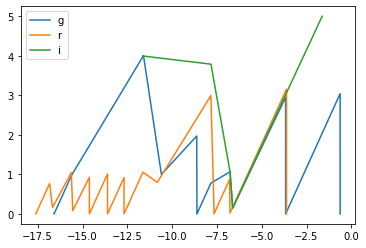

In [4]:
for band in 'gri':
    lc = ds.get_combined_lc(band)
    lc.sort('mjd')
    lc['phase'] = lc['mjd'] - ds.transient.prior_t0
    idx = lc['phase'] > -20
    pre_peak_idx = np.logical_and(idx, lc['phase'] < 0)
    plt.plot(lc['phase'][pre_peak_idx][1:], np.diff(lc['phase'][pre_peak_idx]), label=band)
plt.legend()

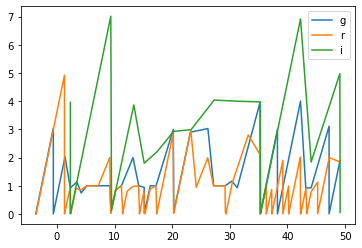

In [7]:
for band in 'gri':
    lc = ds.get_combined_lc(band)
    lc.sort('mjd')
    lc['phase'] = lc['mjd'] - ds.transient.prior_t0
    idx = lc['phase'] > -20
    idx = np.logical_and(idx, lc['phase'] > -5)
    idx = np.logical_and(idx, lc['phase'] < 50)
    plt.plot(lc['phase'][idx][1:], np.diff(lc['phase'][idx]), label=band)
plt.legend()

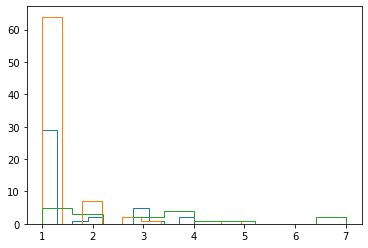

In [11]:
for band in 'gri':
    lc = ds.get_combined_lc(band)
    lc.sort('mjd')
    lc['phase'] = lc['mjd'] - ds.transient.prior_t0
    idx = lc['phase'] > -20
    idx = np.logical_and(idx, lc['phase'] > -5)
    idx = np.logical_and(idx, lc['phase'] < 50)
    diffs = np.diff(lc['phase'][idx])
    diffs[diffs < 1] = 1
    plt.hist(diffs, label=band, histtype='step')